> # 2 지도학습(3)

- 전체 내용 최하단에 정리

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import mglearn.plots

### 2.3.8 신경망(딥러닝)

#### 신경망 모델

Text(0, 0.5, 'ReLU(x), tanh(x), sigmoid(x)')

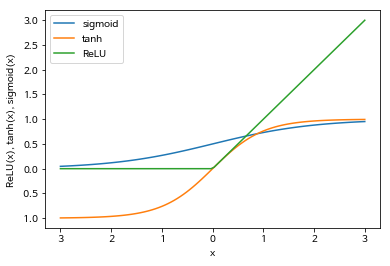

In [55]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
line = np.linspace(-3, 3, 100)
plt.plot(line, sigmoid(line), label="sigmoid")
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="ReLU")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("ReLU(x), tanh(x), sigmoid(x)")

#### 신경망 튜닝

Text(0, 0.5, '특성 1')

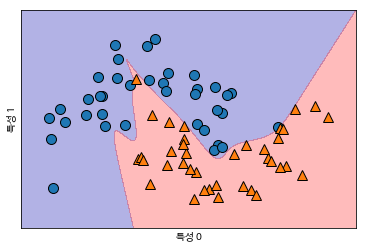

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10],
                   activation='tanh')
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

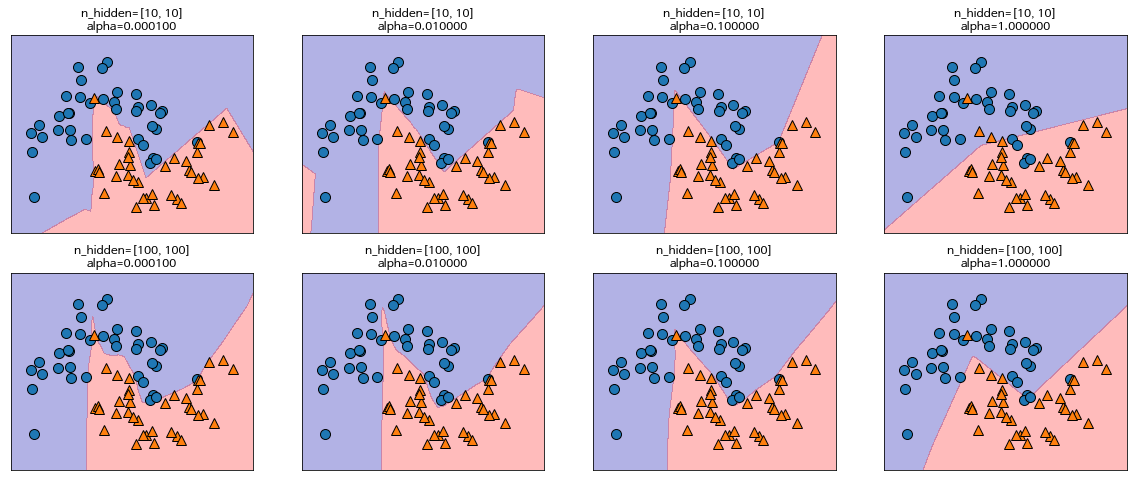

In [68]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

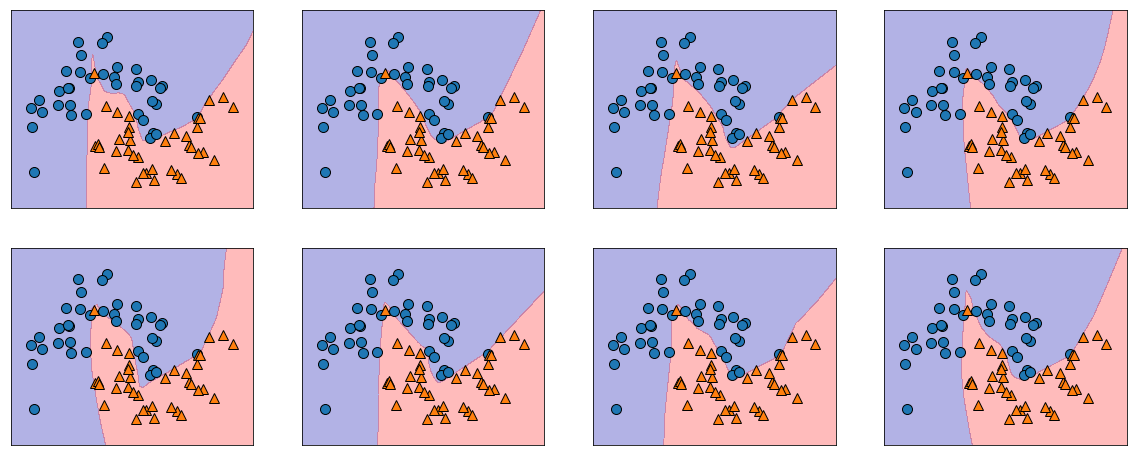

In [69]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                       hidden_layer_sizes=[100,100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최댓값:\n{}".format(cancer.data.max(axis=0)))

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

유방암 데이터의 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [78]:
# 훈련 세트 각 특성의 평균 계산
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차 계산
std_on_train = X_train.std(axis=0)

# 표준화
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [81]:
# 경고 메시지가 나오므로, 반복 횟수를 늘림
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.972


In [82]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


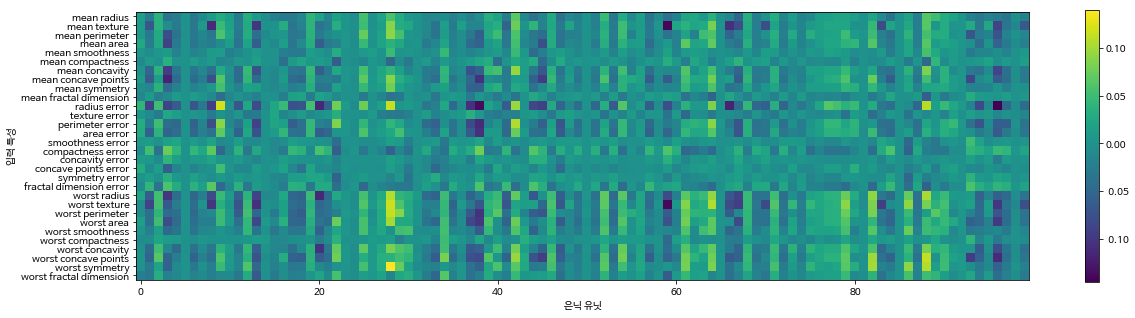

In [83]:
# 행은 입력 특성, 열은 은닉 유닛에 해당
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

#### 장단점과 매개변수

#### 신경망의 복잡도 추정

## 2.4 분류 예측의 불확실성 추정

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

In [8]:
# 클래스 이름 변경
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train, y_test, y_train_named, y_test_named = \
    train_test_split(X, y, y_named, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### 2.4.1 결정 함수

In [88]:
print("X_test.shape: {}".format(X_test.shape))
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [89]:
print("결정 함수:\n{}".format(gbrt.decision_function(X_test)[:6]))

결정 함수:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [90]:
print("임계치와 결정 함수 결과 비교:\n{}".format(gbrt.decision_function(X_test) > 0))
print("예측:\n{}".format(gbrt.predict(X_test)))

임계치와 결정 함수 결과 비교:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [9]:
# 불리언 값을 0과 1로 변경
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# 인덱스로 사용
pred = gbrt.classes_[greater_zero]

# 결과 비교
print("pred는 예측 결과와 같다: {}".format(np.all(pred == gbrt.predict(X_test))))

pred는 예측 결과와 같다: True


In [10]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(np.min(decision_function),
                                            np.max(decision_function)))

결정 함수 최솟값: -7.69 최댓값: 4.29


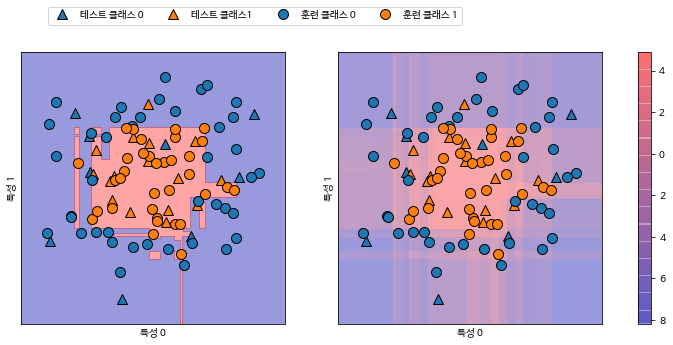

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                               fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                          alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                            markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(score_image, ax=axes.tolist())
axes[0].legend(["테스트 클래스 0", "테스트 클래스1", "훈련 클래스 0",
               "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

### 2.4.2 예측 확률

In [13]:
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test[:6])))

예측 확률:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


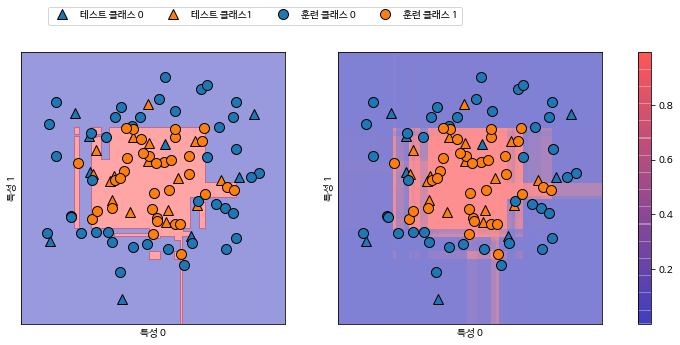

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                            markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["테스트 클래스 0", "테스트 클래스1", "훈련 클래스 0",
               "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

### 2.4.3 다중 분류에서의 불확실성

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("결정 함수의 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [17]:
print("가장 큰 결정 함수의 인덱스:\n{}".format(
    np.argmax(gbrt.decision_function(X_test), axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 결정 함수의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [18]:
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("합: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

예측 확률:
[[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]
합: [1. 1. 1. 1. 1. 1.]


In [19]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(
    np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 예측 확률의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류: {}".format(logreg.classes_))
print("예측: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스: {}".format(argmax_dec_func[:10]))
print("인덱스를 classes_에 연결: {}".format(
    logreg.classes_[argmax_dec_func][:10]))

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## 2.5 요약 및 정리

## 2.3 지도 학습 알고리즘

### 8) 신경망(딥러닝)

① 특징
- 다층 퍼셉트론은 피드포워드 신경망, 신경망 등으로 불림
- 선형 모델의 일반화된 모습이라고 볼 수 있음
- 가중치의 합을 만드는 과정이 여러 번 반복
- 유닛의 가중치 합을 게산한 후 비선형 함수인 렐루나 하이퍼볼릭 탄젠트를 적용
- 은닉 유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하다고 추론
- 은닉층과 출력층 사이의 가중치에 대해서 해석하기는 더 어려움

② 장단점
- 많은 애플리케이션에서 최고의 모델로 주목
- 대량의 데이터에서 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있음
- 크고 강력한 모델의 경우 학습이 오래 걸림
- 전처리에 주의하여야 한다
- 같은 특성을 가진 데이터에 잘 작동 (다른 특성의 경우 트리 기반이 더 뛰어날 수도)
- 매개변수 조정의 어려움

③ 신경망에서의 매개변수의 조정
- 처음에는 한개 또는 두 개의 은닉층으로 시작
- 은닉층의 유닛 수는 보통 입력 특성의 수와 비슷하게 설정
- 일반적으로 충분히 과대적합될 만한 모델을 먼저 만듬
- 이후 구조를 줄이거나, 규제 강화를 위해 alpha 값을 증가시켜 일반화 성능 향상
- solver 매개변수의 기본값은 'adam', 데이터 스케일에 민감
- 'lbfgs'는 비교적 안정적이지만 규모가 큰 모델에서는 시간이 오래 걸림
- 'sgd' 옵션은 다른 여러 매개변수와 함께 튜닝하는 방법(사용자 가이드 참고)
- adam이나 sgd에서 전체 데이터를 일정 크기를 나누는 mini-batch 사용 가능
- 이때, 학습된 것을 유지하면서 반복하여 학습하는 partial_fit 메서드 사용

## 2.4 분류 예측의 불확실성 추정

- 대부분의 사이킷런 분류기들은 decision_function, predict_proba 함수를 제공

### 1) 결정함수와 예측 확률

① 결정 함수 decision_function
- 샘플 하나마다 실수 값 반환, 클래스에 속한다고 믿는 정도
- 양수는 양성 클래스 음수는 그 반대 클래스를 의미

② 예측 확률 predict_proba
- 각 클래스의 예측확률로 나열되어 있음
- 출력은 항상 0과 1사이

### 2) 다중 분류에서의 불확실성

- 이진 분류의 옵션과 마찬가지

## 2.5 요약 및 정리

① 일반화
- 데이터에 잘 맞는 모델 학습
- 훈련 데이터의 특징을 잘 반영하지 못함 -> 과소적합
- 훈련 데이터에 너무 맞춰져 있음 -> 과대적합

② 다양한 알고리즘
- k-NN: 적은 데이터, 기본 모델, 설명 쉬움
- 선형 모델: 대용량, 빠름, 고차원 데이터
- 나이브 베이즈: 분류만, 매우 빠름, 정확도는 낮은편
- 결정 트리: 매우 빠름, 스케일 조정 필요없음, 설명 쉬움
- 랜덤 포레스트: 매우 안정적이고 강력, 고차원 희소 데이터는 잘 안맞음
- 그래디언트 부스팅: 성능 매우 좋음, 학습은 느리나 에측이 빠름, 매개변수 튜닝 多
- 서포트 벡터 머신: 데이터 스케일 조정 필요, 중간 규모의 데이터셋, 매개변수 민감
- 신경망: 대용량 데이터셋, 매개변수, 데이터 스케일에 민감, 학습 오래걸림